## Business Objective

**I am a store manager, what can I do to enhance my revenue across 100 stores?**  

**When I discount some items, will that drive up average sales per basket？** 

** Some product may have elasticity of demand, other product may not (Once I step into the store, I am going to start browsing and I am gonna buying more stuff I probably won't need. So that's what they want, they want to change people's behavior. If you markdown the price of merchandise, it's going to drive up sales of products.) (Percent change in demand is more than percent change in price)**  

**Cross-selling: what are the prodcuts that people tend to buy together. Association Rule.**  
**Upselling: Salesperson tries to persuade customers to buy a higher-end product, an upgrade or the newest version of an item.**  

** Shall we markdown? How much shall we markdown? Does it make sense to markdown? Product Category?**

<br>

## Look at Data First

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
start_time = datetime.now()
data = pd.read_csv('RetailerPromotionStrategy_data.csv')
print datetime.now()-start_time

0:00:01.052109


In [13]:
data.shape

(1048575, 7)

In [14]:
data.head(10)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.0,1.0,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.0,1.0,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.0,1.0,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.0,1.0,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.0,1.0,3/11/12 00:00,A1449
5,A29,11-7270-00007-00057,52,1700.0,1.0,3/11/12 00:00,A12434
6,A29,11-7270-00007-00057,57,1695.0,1.0,3/11/12 00:00,A13081
7,A29,11-7270-00007-00057,58,2095.0,1.0,3/11/12 00:00,A5985
8,A29,11-7270-00007-00057,59,1650.0,1.0,3/11/12 00:00,A21387
9,A29,11-7270-00007-00057,60,1795.0,1.0,3/11/12 00:00,A5987


In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Line,Sales,Count
count,1048575.000,1048575.000,1048575.000
mean,10.727,1720.513,0.896
std,15.550,3646.003,1.129
min,1.000,-99995.000,-120.000
25%,3.000,395.000,1.000
50%,7.000,1295.000,1.000
75%,14.000,2195.000,1.000
max,823.000,99995.000,120.000


In [37]:
# How many observations in each Line
data['Line'].value_counts()

1      138198
2      103886
3       84615
4       72704
5       63255
6       56578
7       50227
8       45197
9       40427
10      36305
11      32797
12      29470
13      26529
14      23595
15      21240
16      19211
17      17401
18      15649
19      14274
20      12758
21      11479
22      10460
23       9544
24       8744
25       7832
26       7065
27       6486
28       6029
29       5405
30       4995
        ...  
285         1
796         1
236         1
748         1
750         1
239         1
240         1
754         1
755         1
756         1
246         1
758         1
760         1
763         1
764         1
765         1
256         1
265         1
267         1
268         1
269         1
270         1
272         1
277         1
278         1
279         1
280         1
281         1
282         1
182         1
Name: Line, Length: 604, dtype: int64

In [64]:
# How many oberservations in each Count category
data['Count'].value_counts().sort_values(ascending=False)

1.000       850239
0.000       171448
-1.000        8577
2.000         5810
10.000        2943
4.000         2471
3.000         1687
6.000         1624
5.000         1271
8.000          356
-2.000         345
20.000         283
9.000          222
12.000         175
-3.000         150
30.000         117
7.000          104
15.000          78
-4.000          76
18.000          56
-10.000         52
-5.000          46
-6.000          46
16.000          44
40.000          42
24.000          35
11.000          26
14.000          23
13.000          23
50.000          22
             ...  
-16.000          2
80.000           2
29.000           2
54.000           2
-25.000          2
-18.000          2
72.000           2
-54.000          2
-48.000          1
39.000           1
91.000           1
-9.000           1
-120.000         1
-40.000          1
-91.000          1
-36.000          1
-11.000          1
-14.000          1
26.000           1
65.000           1
-33.000          1
-7.000      

In [40]:
data.loc[(data['Count']==-120)|(data['Count']==120)| (data['Sales']==-99995)|(data['Sales']==99995)|
        (data['Line']==823)|(data['Line']==763)]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
304917,A22,12-7234-00007-00457,1,99995.000,1.000,3/12/12 00:00,A19551
304918,A22,12-7234-00007-00457,2,-99995.000,-1.000,3/12/12 00:00,A19551
378017,A27,12-7070-00007-00002,763,3195.000,1.000,3/12/12 00:00,A3503
378029,A27,12-7070-00007-00002,823,-646.000,0.000,3/12/12 00:00,A25525
653883,A46,12-7027-00013-00092,3,60000.000,120.000,3/12/12 00:00,A10809
653885,A46,12-7027-00013-00092,6,-60000.000,-120.000,3/12/12 00:00,A10809


<br><br>

## Exploratory Data Analysis

### Explore cases when Count=0

In [85]:
data.loc[data['Count']==0].head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
12,A29,11-7270-00007-00057,63,-786.000,0.000,3/11/12 00:00,A256
14,A29,11-7270-00007-00057,65,-770.000,0.000,3/11/12 00:00,A8481
20,A29,11-7270-00007-00057,75,-500.000,0.000,3/11/12 00:00,A2341
34,A29,11-7270-00007-00059,3,-800.000,0.000,3/11/12 00:00,A24593
39,A29,11-7270-00007-00060,9,-475.000,0.000,3/11/12 00:00,A15257


In [52]:
# When Count=0, it means it's a discount applied to the purchase
data.loc[(data['SKU']=='A256')&(data['TransactionID']=='11-7270-00007-00057')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
11,A29,11-7270-00007-00057,62,2095.000,1.000,3/11/12 00:00,A256
12,A29,11-7270-00007-00057,63,-786.000,0.000,3/11/12 00:00,A256


In [108]:
# Why there are rows where Count=0 but Sales>0?
data.loc[(data['Count']==0)&(data['Sales']>0)].head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
1161,A29,11-7270-00007-00110,29,845.000,0.000,3/11/12 00:00,A6007
1234,A29,11-7270-00007-00116,20,234.000,0.000,3/11/12 00:00,A2452
4065,A29,11-7270-00008-00358,6,670.000,0.000,3/11/12 00:00,A13774
5634,A29,11-7270-00014-00241,10,333.000,0.000,3/11/12 00:00,A21307
9361,A29,11-7270-00006-00209,33,475.000,0.000,3/11/12 00:00,A15257


In [113]:
# Select rows where transactionID and SKU match transactionID and SKU when Count=0 but Sales>0
q = '''
    select
        d1.StoreID, d1.TransactionID, d1.Line, d1.Sales, d1.Count, d1.Date, d1.SKU
    from 
        data d1
    inner join
        (select 
            TransactionID, SKU
        from
            data
        where Sales>0 and Count=0) as d2
    on 
        d1.TransactionID = d2.TransactionID and
        d1.SKU = d2.SKU
    '''
data1 = pysqldf(q)

In [116]:
data1.head(10)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00110,22,2195.000,1.000,3/11/12 00:00,A6007
1,A29,11-7270-00007-00110,23,-845.000,0.000,3/11/12 00:00,A6007
2,A29,11-7270-00007-00110,24,2195.000,1.000,3/11/12 00:00,A6007
3,A29,11-7270-00007-00110,25,-845.000,0.000,3/11/12 00:00,A6007
4,A29,11-7270-00007-00110,26,2195.000,1.000,3/11/12 00:00,A6007
5,A29,11-7270-00007-00110,27,-845.000,0.000,3/11/12 00:00,A6007
6,A29,11-7270-00007-00110,28,-2195.000,-1.000,3/11/12 00:00,A6007
7,A29,11-7270-00007-00110,29,845.000,0.000,3/11/12 00:00,A6007
8,A29,11-7270-00007-00116,15,1423.000,1.000,3/11/12 00:00,A2452
9,A29,11-7270-00007-00116,16,-234.000,0.000,3/11/12 00:00,A2452


### We know from the above table: some customers have bought the discounted items but he told the counter cashier that he didn't want this item anymore. In order to not include the discount from that item, we have to add that discount back. 

<br><br>

### Explore cases when Count=-1

In [66]:
# Count=-1
data.loc[data['Count']==-1].head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
100,A29,11-7270-00007-00066,5,-2013.000,-1.000,3/11/12 00:00,A2729
354,A19,11-7287-00025-00075,4,-1721.000,-1.000,3/11/12 00:00,A16911
446,A27,11-7069-00020-00010,6,-4252.000,-1.000,3/11/12 00:00,A7293
458,A29,11-7270-00007-00072,37,-2395.000,-1.000,3/11/12 00:00,A19365
622,A29,11-7270-00007-00089,19,-3995.000,-1.000,3/11/12 00:00,A21166


In [87]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [119]:
q = '''
    select
        d1.StoreID, d1.TransactionID, d1.Line, d1.Sales, d1.Count, d1.Date, d1.SKU
    from 
        data d1
    inner join
        (select 
            TransactionID, SKU
        from
            data
        where Count=-1) as d2
    on 
        d1.TransactionID = d2.TransactionID and
        d1.SKU = d2.SKU
    '''
data1 = pysqldf(q)

In [120]:
data1.head(20)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00066,3,2013.000,1.000,3/11/12 00:00,A2729
1,A29,11-7270-00007-00066,4,2013.000,1.000,3/11/12 00:00,A2729
2,A29,11-7270-00007-00066,5,-2013.000,-1.000,3/11/12 00:00,A2729
3,A19,11-7287-00025-00075,3,1721.000,1.000,3/11/12 00:00,A16911
4,A19,11-7287-00025-00075,4,-1721.000,-1.000,3/11/12 00:00,A16911
5,A27,11-7069-00020-00010,1,4252.000,1.000,3/11/12 00:00,A7293
6,A27,11-7069-00020-00010,6,-4252.000,-1.000,3/11/12 00:00,A7293
7,A29,11-7270-00007-00072,33,2395.000,1.000,3/11/12 00:00,A19365
8,A29,11-7270-00007-00072,35,2395.000,1.000,3/11/12 00:00,A19365
9,A29,11-7270-00007-00072,36,2395.000,1.000,3/11/12 00:00,A19365


### We can see from the table, what count=-1 means that this customer didn't want this item at all. 
### There are several cases:
###  1. The customer bought just 1 item and he didn't want this item during the  transaction; 
### 2. The customer bought a discouted item and he didn't want this item during the same transaction;
### 3. The customer bought 2 or over 2 items of this product and he didn't want one of this item during the same transaction.
### 4. The customer bought 1 item and he didn't want this item during the transaction, since he found the same item in a cheaper price.
### 5. Cashier wrongly scanned one item twice.

<br><br>

### Explore cases when count=-2

In [82]:
# Count=-2
q = '''
    select
        d1.StoreID, d1.TransactionID, d1.Line, d1.Sales, d1.Count, d1.Date, d1.SKU
    from 
        data d1
    inner join
        (select 
            TransactionID, SKU
        from
            data
        where Count=-2) as d2
    on 
        d1.TransactionID = d2.TransactionID and
        d1.SKU = d2.SKU
    '''
data2 = pysqldf(q)

In [87]:
data2.head(20)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A17,11-7720-00017-00144,6,1600.000,2.000,3/11/12 00:00,A5678
1,A17,11-7720-00017-00144,7,-1600.000,-2.000,3/11/12 00:00,A5678
2,A19,11-7287-00024-00014,9,1400.000,2.000,3/11/12 00:00,A6653
3,A19,11-7287-00024-00014,10,-1400.000,-2.000,3/11/12 00:00,A6653
4,A29,11-7270-00012-00113,2,-17990.000,-2.000,3/11/12 00:00,A22728
5,A29,11-7270-00012-00113,3,11495.000,1.000,3/11/12 00:00,A22882
6,A29,11-7270-00012-00113,4,11495.000,1.000,3/11/12 00:00,A22882
7,A29,11-7270-00012-00113,6,-22990.000,-2.000,3/11/12 00:00,A22882
8,A29,11-7270-00012-00113,7,17990.000,2.000,3/11/12 00:00,A22882
9,A29,11-7270-00018-00076,1,2800.000,2.000,3/11/12 00:00,A1891


In [92]:
data.loc[(data['SKU']=='A22728')&(data['TransactionID']=='11-7270-00012-00113')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
5003,A29,11-7270-00012-00113,2,-17990.000,-2.000,3/11/12 00:00,A22728


In [101]:
data.loc[(data['SKU']=='A22728')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
5003,A29,11-7270-00012-00113,2,-17990.000,-2.000,3/11/12 00:00,A22728
223347,A15,12-7054-00006-00199,7,11495.000,1.000,3/12/12 00:00,A22728
604225,A43,12-7285-00006-00058,5,11495.000,1.000,3/12/12 00:00,A22728


In [95]:
data.loc[(data['SKU']=='A11920')&(data['TransactionID']=='11-3571-00008-00008')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
23312,A65,11-3571-00008-00008,2,-19990.000,-2.000,3/11/12 00:00,A11920


In [99]:
data.loc[(data['SKU']=='A11920')&(data['StoreID']=='A65')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
17859,A65,11-3571-00002-00340,1,9995.000,1.000,3/11/12 00:00,A11920
20424,A65,11-3571-00001-00209,1,9995.000,1.000,3/11/12 00:00,A11920
20425,A65,11-3571-00001-00209,2,9995.000,1.000,3/11/12 00:00,A11920
23312,A65,11-3571-00008-00008,2,-19990.000,-2.000,3/11/12 00:00,A11920
814110,A65,12-3572-00001-00226,1,9995.000,1.000,3/12/12 00:00,A11920


### Several Cases:
### 1. Customers bought 2 or over 2 items of a product and didn't want 2 of them immediately.
### 2. Customers bought 2 or over 2 items of a product and decided to return items after the transaction.
### 3. Missing Records: There are some obervations only indicate they didn't want to buy them, but no observations indicate they already have bought them (when count is positive)

<br><br>

### Check Missing Values

In [123]:
data.isnull().sum()

StoreID          0
TransactionID    0
Line             0
Sales            0
Count            0
Date             0
SKU              0
dtype: int64

<br><br>

### Explore Outliers

In [29]:
data.describe()

,Line,Sales,Count
count,1048575.000,1048575.000,1048575.000
mean,10.727,1720.513,0.896
std,15.550,3646.003,1.129
min,1.000,-99995.000,-120.000
25%,3.000,395.000,1.000
50%,7.000,1295.000,1.000
75%,14.000,2195.000,1.000
max,823.000,99995.000,120.000


In [30]:
import numpy as np
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [58]:
np.set_printoptions(formatter={'float_kind':lambda x: "%.2f" % x})
outlier_var = ['Line','Sales','Count']
for x in outlier_var:
    tukey_indices, tukey_values = find_outliers_tukey(data[x])
    a = np.sort(tukey_values)
    print "Feature '{0}' first and last 10 outliers：{1}{2}\n".format(x,np.unique(a)[:10],np.unique(a)[-10:])
    print "Number of outliers: {0}\n".format(len(tukey_values))

Feature 'Line' first and last 10 outliers：[31 32 33 34 35 36 37 38 39 40][796 797 805 806 808 809 811 812 822 823]

Number of outliers: 66220

Feature 'Sales' first and last 10 outliers：[-99995.00 -99900.00 -89900.00 -88800.00 -86400.00 -84995.00 -84900.00
 -80000.00 -79995.00 -79950.00][86900.00 88000.00 89900.00 90000.00 92120.00 94900.00 96000.00 99000.00
 99900.00 99995.00]

Number of outliers: 85599

Feature 'Count' first and last 10 outliers：[-120.00 -91.00 -60.00 -54.00 -48.00 -40.00 -39.00 -36.00 -33.00 -32.00][58.00 60.00 65.00 70.00 72.00 80.00 90.00 91.00 99.00 120.00]

Number of outliers: 198336



In [151]:
np.percentile(data['Sales'],95)

5500.0

In [59]:
np.percentile(data['Sales'],5)

-825.0

In [154]:
data.loc[(data['Count']==120)|(data['Count']==-120)]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
653883,A46,12-7027-00013-00092,3,60000.000,120.000,3/12/12 00:00,A10809
653885,A46,12-7027-00013-00092,6,-60000.000,-120.000,3/12/12 00:00,A10809


In [66]:
data.loc[(data['SKU']=='A17041')&(data['TransactionID']=='12-7304-00002-00016')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
655356,A47,12-7304-00002-00016,10,89900.000,1.000,3/12/12 00:00,A17041
655357,A47,12-7304-00002-00016,11,89900.000,1.000,3/12/12 00:00,A17041
655358,A47,12-7304-00002-00016,12,-89900.000,-1.000,3/12/12 00:00,A17041


In [67]:
# There are some cases where only have negative sales but no corresponding positive sales with the same transactionID and SKU
data.loc[(data['SKU']=='A24153')&(data['TransactionID']=='12-3097-00008-00087')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
844638,A67,12-3097-00008-00087,2,-88800.000,-2.000,3/12/12 00:00,A24153


In [185]:
# Check how much the mean changes after we drop the outliers in 'Sales'
data['Sales'].mean()

1720.5125972246444

In [191]:
tukey_indices, tukey_values = find_outliers_tukey(data['Sales'])
data.drop(tukey_indices,inplace=True)

In [193]:
# After Drop
data['Sales'].mean()

1208.8544643218809

### The mean of sales appears to change a lot if we drop those outliers, so we can't treat them as negligible.
### We can't also replace those outliers with 99 percentile value of that feature. Since there are both positive and negative outliers and some absolute value are same, which means it doesn't infulence average revenue.

<br><br>

### Average Revenue per Basket

In [68]:
data = pd.read_csv('RetailerPromotionStrategy_data.csv')

In [301]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.000,1.000,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.000,1.000,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.000,1.000,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.000,1.000,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.000,1.000,3/11/12 00:00,A1449


In [162]:
len(data.TransactionID.unique())

197714

In [222]:
# Select transactions who have discount items and total sales>0
q='''
  select
      a.StoreID,
      a.TransactionID,
      sum(a.Count) as Counts,
      sum(a.Sales) as Total
  from
      data a
  inner join
      (select StoreID, TransactionID
       from data
       where Count=0) b
  on
      a.StoreID=b.StoreID and a.TransactionID=b.TransactionID
  group by
      a.StoreID, 
      a.TransactionID
  having
      Total>0
  '''
data1= pysqldf(q)

In [274]:
data1.head()

,StoreID,TransactionID,Counts,Total
0,A01,12-7149-00001-00004,12.000,6960.000
1,A01,12-7149-00001-00005,144.000,331200.000
2,A01,12-7149-00001-00006,24.000,33420.000
3,A01,12-7149-00001-00013,20.000,39960.000
4,A01,12-7149-00001-00016,4.000,6648.000


In [327]:
# Average sales per basket (there are discount items in transactions)
avg_rev_discount = data1.Total.sum() / data1.TransactionID.size

print 'Average sales per basket for those transactions include discount items is {0}.'.format(avg_rev_discount)

Average sales per basket for those transactions include discount items is 45388.6339343.


In [352]:
# Average sales per basket in different store
avg_rev_discount_store = data1.groupby('StoreID').Total.sum() / data1.groupby('StoreID').TransactionID.size()

In [319]:
# Select transactions which don't have any discount items

q = '''
    select
      t1.StoreID,
      t1.TransactionID,
      sum(t1.Count) as Counts,
      sum(t1.Sales) as Total
    from
    (select
        a.StoreID, a. TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
    from 
        data a
    left join
        data1 b
    on 
        a.StoreID=b.StoreID and a.TransactionID=b.TransactionID
    where
        b.StoreID is null) t1
    group by
      t1.StoreID, 
      t1.TransactionID
    having
      Total>0    
    '''
data2 = pysqldf(q)

In [320]:
data2.head()

,StoreID,TransactionID,Counts,Total
0,A01,12-7149-00001-00002,4.000,6645.000
1,A01,12-7149-00001-00003,1.000,1000.000
2,A01,12-7149-00001-00007,1.000,3300.000
3,A01,12-7149-00001-00008,4.000,3871.000
4,A01,12-7149-00001-00009,7.000,6864.000


In [409]:
len(data1.TransactionID.unique())

55631

In [321]:
len(data2.TransactionID.unique())

136226

In [326]:
# Average sales per basket (there aren't any discount items in transactions)
avg_rev_discount1 = data2.Total.sum() / data2.TransactionID.size

print 'Average sales per basket for those transactions include discount items is {0}.'.format(avg_rev_discount1)

Average sales per basket for those transactions include discount items is 7490.94903763.


In [353]:
# Average sales per basket without discount items in different store
avg_rev_discount_store1 = data2.groupby('StoreID').Total.sum() / data2.groupby('StoreID').TransactionID.size()

In [101]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

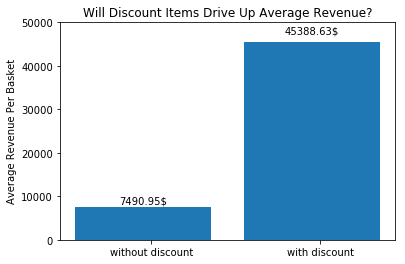

In [345]:
fig, ax = plt.subplots()
x=np.arange(2)
width=0.1
rects1 = ax.bar(x,[avg_rev_discount1,avg_rev_discount])
ax.set_ylabel('Average Revenue Per Basket')
ax.set_ylim(0,50000)
ax.set_title('Will Discount Items Drive Up Average Revenue?')
ax.set_xticks(x+width/2 )
ax.set_xticklabels(('without discount','with discount'))
#annotate
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.035*height, '{:.2f}$'.format(height), ha='center', va='bottom')
autolabel(rects1)

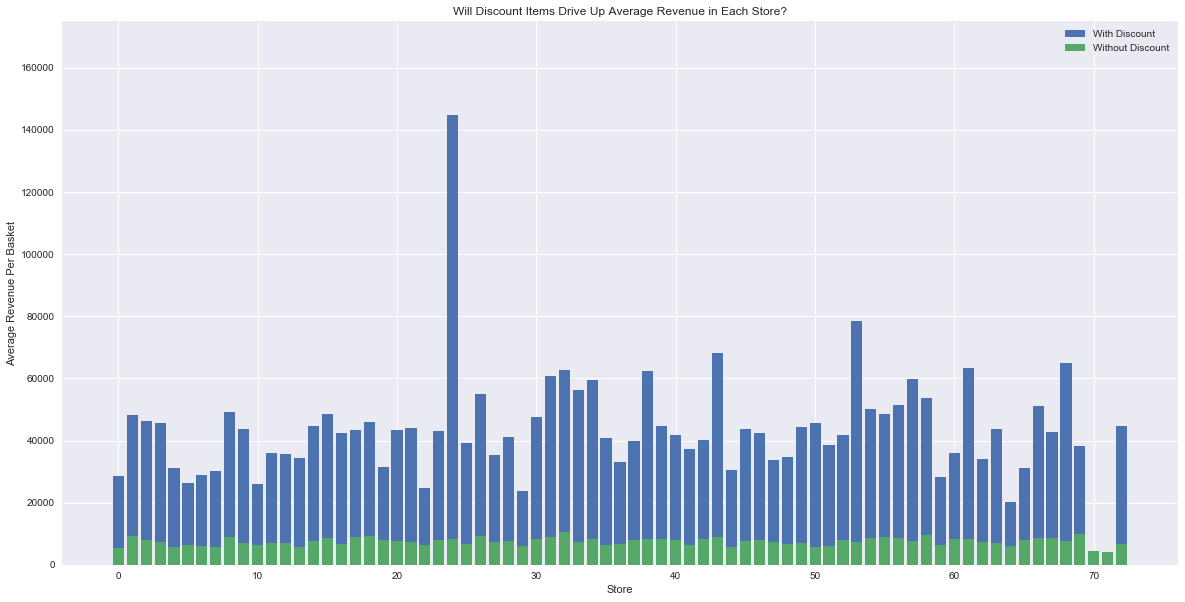

In [410]:
# Visualize average sales per basket in different store
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(avg_rev_discount_store))
width=0.5
rects1 = ax.bar(x,avg_rev_discount_store,width=(x[1]-x[0])*0.8)
ax.set_ylabel('Average Revenue Per Basket')
ax.set_ylim(0,175000)
ax.set_xlabel('Store')
ax.set_title('Will Discount Items Drive Up Average Revenue in Each Store?')

rects2 = ax.bar(x,avg_rev_discount_store1)

ax.legend((rects1[0],rects2[0]),('With Discount','Without Discount'))

### According to above plots, we can conclude that discount items will drive up average sales per basket.

<br><br>

### Average Sales Per Item for Each Product

In [92]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.000,1.000,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.000,1.000,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.000,1.000,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.000,1.000,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.000,1.000,3/11/12 00:00,A1449


In [94]:
# Select discount items and group by SKU
q='''
  select
      a.SKU,
      sum(a.Count) as Counts,
      sum(a.Sales) as Total
  from
      data a
  inner join
      (select SKU, TransactionID
       from data
       where Count=0) b
  on
      a.SKU=b.SKU and a.TransactionID=b.TransactionID
  group by
      a.SKU
  having
      Total>0
  '''
data1= pysqldf(q)

In [95]:
data1.head()

,SKU,Counts,Total
0,A1,26.000,30392.000
1,A10004,36.000,54334.000
2,A10022,3.000,5000.000
3,A10045,14.000,18708.000
4,A10048,90.000,112500.000


In [97]:
# average sales per item
data1['Average_sales'] = data1.Total / data1.Counts
data1.head()

,SKU,Counts,Total,Average_sales
0,A1,26.000,30392.000,1168.923
1,A10004,36.000,54334.000,1509.278
2,A10022,3.000,5000.000,1666.667
3,A10045,14.000,18708.000,1336.286
4,A10048,90.000,112500.000,1250.000


In [98]:
# Select same items in data1 that are not discounted
q='''
  select
      a.SKU,
      sum(a.Count) as Counts,
      sum(a.Sales) as Total
  from
      data a
  inner join
      (select SKU, TransactionID
       from data
       where Count=0) b
  on
      a.SKU = b.SKU and a.TransactionID != b.TransactionID
  group by
      a.SKU
  having
      Total>0
  '''
data2= pysqldf(q)

In [99]:
data2.head()

,SKU,Counts,Total
0,A1,1534.000,1863248.000
1,A10004,3744.000,8491286.000
2,A10022,30.000,42955.000
3,A10023,297.000,206415.000
4,A10025,3.000,75000.000


In [111]:
data[(data['SKU']=='A10023')& (data['Count']==0)]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
611272,A43,12-7285-00011-00011,1,0.000,0.000,3/12/12 00:00,A10023


In [113]:
# Some cases will have Sales=0 when Count=0, we shoulde exclude these SKUs
data[(data['TransactionID']=='12-7285-00011-00011')& (data['SKU']=='A10023')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
611272,A43,12-7285-00011-00011,1,0.000,0.000,3/12/12 00:00,A10023


In [107]:
data2.shape

(4141, 4)

In [104]:
# average sales per item
data2['Average_sales'] = data2.Total / data2.Counts
data2.head()

,SKU,Counts,Total,Average_sales
0,A1,1534.000,1863248.000,1214.634
1,A10004,3744.000,8491286.000,2267.972
2,A10022,30.000,42955.000,1431.833
3,A10023,297.000,206415.000,695.000
4,A10025,3.000,75000.000,25000.000


In [128]:
# Inner Join data1 and data2 with same SKU
q='''
  select
    a.SKU, a.Average_sales as Discount_Average_Sales , b.Average_sales as Non_Discount_Average_Sales
  from
      data1 a
  inner join
      data2 b
  on
      a.SKU = b.SKU
  '''
data3= pysqldf(q)

In [129]:
data3.head()

,SKU,Discount_Average_Sales,Non_Discount_Average_Sales
0,A1,1168.923,1214.634
1,A10004,1509.278,2267.972
2,A10022,1666.667,1431.833
3,A10045,1336.286,1602.636
4,A10048,1250.000,1376.146


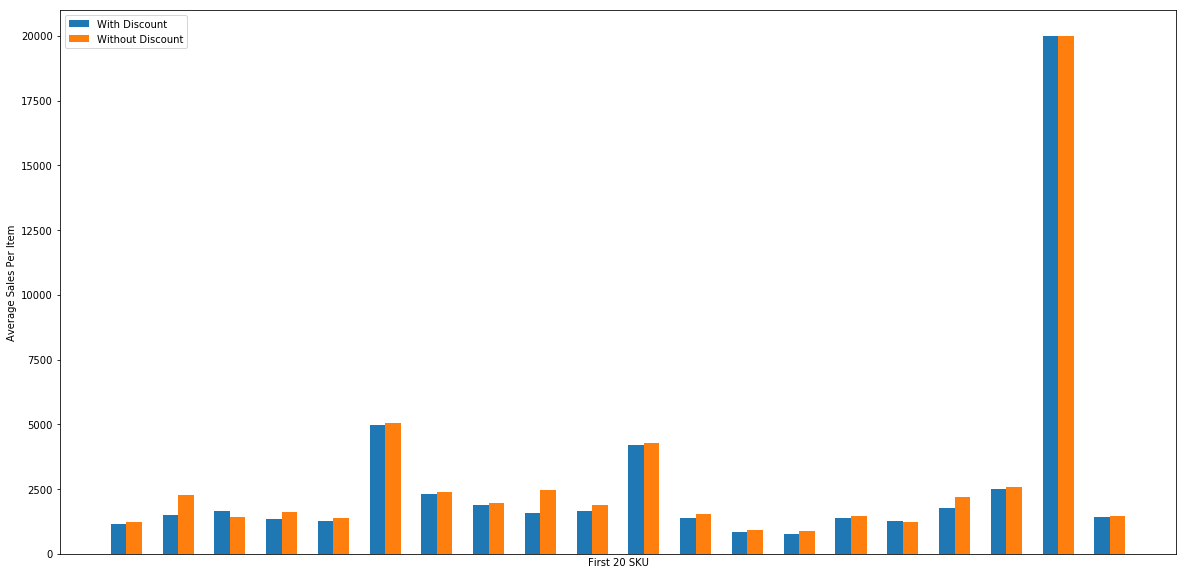

In [143]:
# Visualize total sales for each product 
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(20)
rects1 = ax.bar(x,data3.Discount_Average_Sales[:20],width=(x[1]-x[0])*0.3)
ax.set_ylabel('Average Sales Per Item')
ax.set_xlabel('First 20 SKU')
ax.set_xticks(x+0.3/2)
rects2 = ax.bar(x+0.3,data3.Non_Discount_Average_Sales[:20],width=(x[1]-x[0])*0.3) #another bar
ax.legend((rects1[0],rects2[0]),('With Discount','Without Discount')) #legend

plt.tick_params(axis='x',bottom='off',labelbottom='off')

### It appears some SKU has higher average sales per item for product who are discounted than for the same product who are not discounted. So we may not to implement markdown stategies in those products.

<br><br>

### Elasticity of Demand
#### Percent change in demand / Percnet change in price

In [69]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.000,1.000,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.000,1.000,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.000,1.000,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.000,1.000,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.000,1.000,3/11/12 00:00,A1449


In [84]:
data[data['SKU']=='A8481'].head(10)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
13,A29,11-7270-00007-00057,64,2051.000,1.000,3/11/12 00:00,A8481
14,A29,11-7270-00007-00057,65,-770.000,0.000,3/11/12 00:00,A8481
8227,A29,11-7270-00006-00161,13,2051.000,1.000,3/11/12 00:00,A8481
8228,A29,11-7270-00006-00161,14,-770.000,0.000,3/11/12 00:00,A8481
11696,A29,11-7270-00006-00312,11,2051.000,1.000,3/11/12 00:00,A8481
11697,A29,11-7270-00006-00312,12,-770.000,0.000,3/11/12 00:00,A8481
12444,A29,11-7270-00008-00235,7,2051.000,1.000,3/11/12 00:00,A8481
12445,A29,11-7270-00008-00235,8,-774.000,0.000,3/11/12 00:00,A8481
19516,A78,11-5634-00003-00090,10,2051.000,1.000,3/11/12 00:00,A8481
19517,A78,11-5634-00003-00090,11,-814.000,0.000,3/11/12 00:00,A8481


### Association Analysis

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv('RetailerPromotionStrategy_data.csv')

In [412]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [3]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.0,1.0,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.0,1.0,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.0,1.0,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.0,1.0,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.0,1.0,3/11/12 00:00,A1449


In [4]:
# Explore StoreID = A29
basket = data[data['StoreID']=='A29'].groupby(['TransactionID','SKU'])['Count'].sum().unstack().reset_index().fillna(0).set_index('TransactionID')

In [5]:
basket.head()

SKU,A1,A10004,A10006,A10007,A10008,A10016,A10023,A10024,A10025,A10045,...,A9933,A9938,A9941,A9942,A9946,A9947,A9963,A9964,A9981,A9982
TransactionID,,,,,,,,,,,,,,,,,,,,,
11-7270-00005-00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-7270-00005-00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-7270-00005-00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-7270-00005-00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-7270-00005-00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [16]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(A2854),(A3664),0.045802,0.254902,1.624225
1,(A3664),(A2854),0.156938,0.074392,1.624225
2,(A25312),(A3664),0.039291,0.325714,2.075438
3,(A3664),(A25312),0.156938,0.081545,2.075438


In [17]:
basket['A25312'].sum()

280.0

In [18]:
basket['A3664'].sum()

811.0

### In store A29, since the confidence and lift are not high in each rule, we conclude there is no strong relationship between two items.

<br><br>

In [22]:
# Explore StoreID = A79
basket = data[data['StoreID']=='A79'].groupby(['TransactionID','SKU'])['Count'].sum().unstack().reset_index().fillna(0).set_index('TransactionID')
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(A5483),(A13675),0.010922,1.000000,51.500000
1,(A13675),(A5483),0.019417,0.562500,51.500000
2,(A25312),(A8397),0.064320,0.188679,6.477987
3,(A8397),(A25312),0.029126,0.416667,6.477987
4,(A2854),(A3664),0.058252,0.229167,1.072917


In [26]:
print basket['A5483'].sum()

print basket['A13675'].sum()

14.0
25.0


### We can see in Store A79, there are a quite few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transactions and product combinatons. 
### We can see several where the confidence is high as well.
### In looking at above rules, it seems that product A5483 and A13675 are purchased together, product A13675 and A5483 are purchased together, product A8397 and A25312 are purchased together.
### We can drive up sales through recommendation from their antecendants.
